In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
heart_data=pd.read_csv(r'C:\Users\Pranitha\OneDrive\Desktop\heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x=heart_data.drop(columns='target',axis=1)
y=heart_data['target']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=45)

In [6]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [7]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
input_data_str=['62','0','0','140','268','0','0','160','0','3.6','0','2','2']
input_data=np.array(input_data_str,dtype=float).reshape(1,-1)

In [8]:
prediction=model.predict(input_data)
print(prediction)
if prediction[0]==0:
    print('The person doesnot have a heart disease')
else:
    print('The person has heart disease')

[0]
The person doesnot have a heart disease


In [9]:
print(training_data_accuracy)

0.871900826446281


In [10]:
import pickle
filename='heart_disease_model1.sav'
pickle.dump(model,open(filename,'wb'))
loaded_model=pickle.load(open('heart_disease_model1.sav','rb'))
for column in x.columns:
    print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


# Diabetes 

In [11]:
diabetes_dataset=pd.read_csv(r'C:\Users\Pranitha\OneDrive\Desktop\diabetes.csv')

In [12]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
x=diabetes_dataset.drop(columns='Outcome',axis=1)
y=diabetes_dataset['Outcome']

In [14]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Diabetes patient')

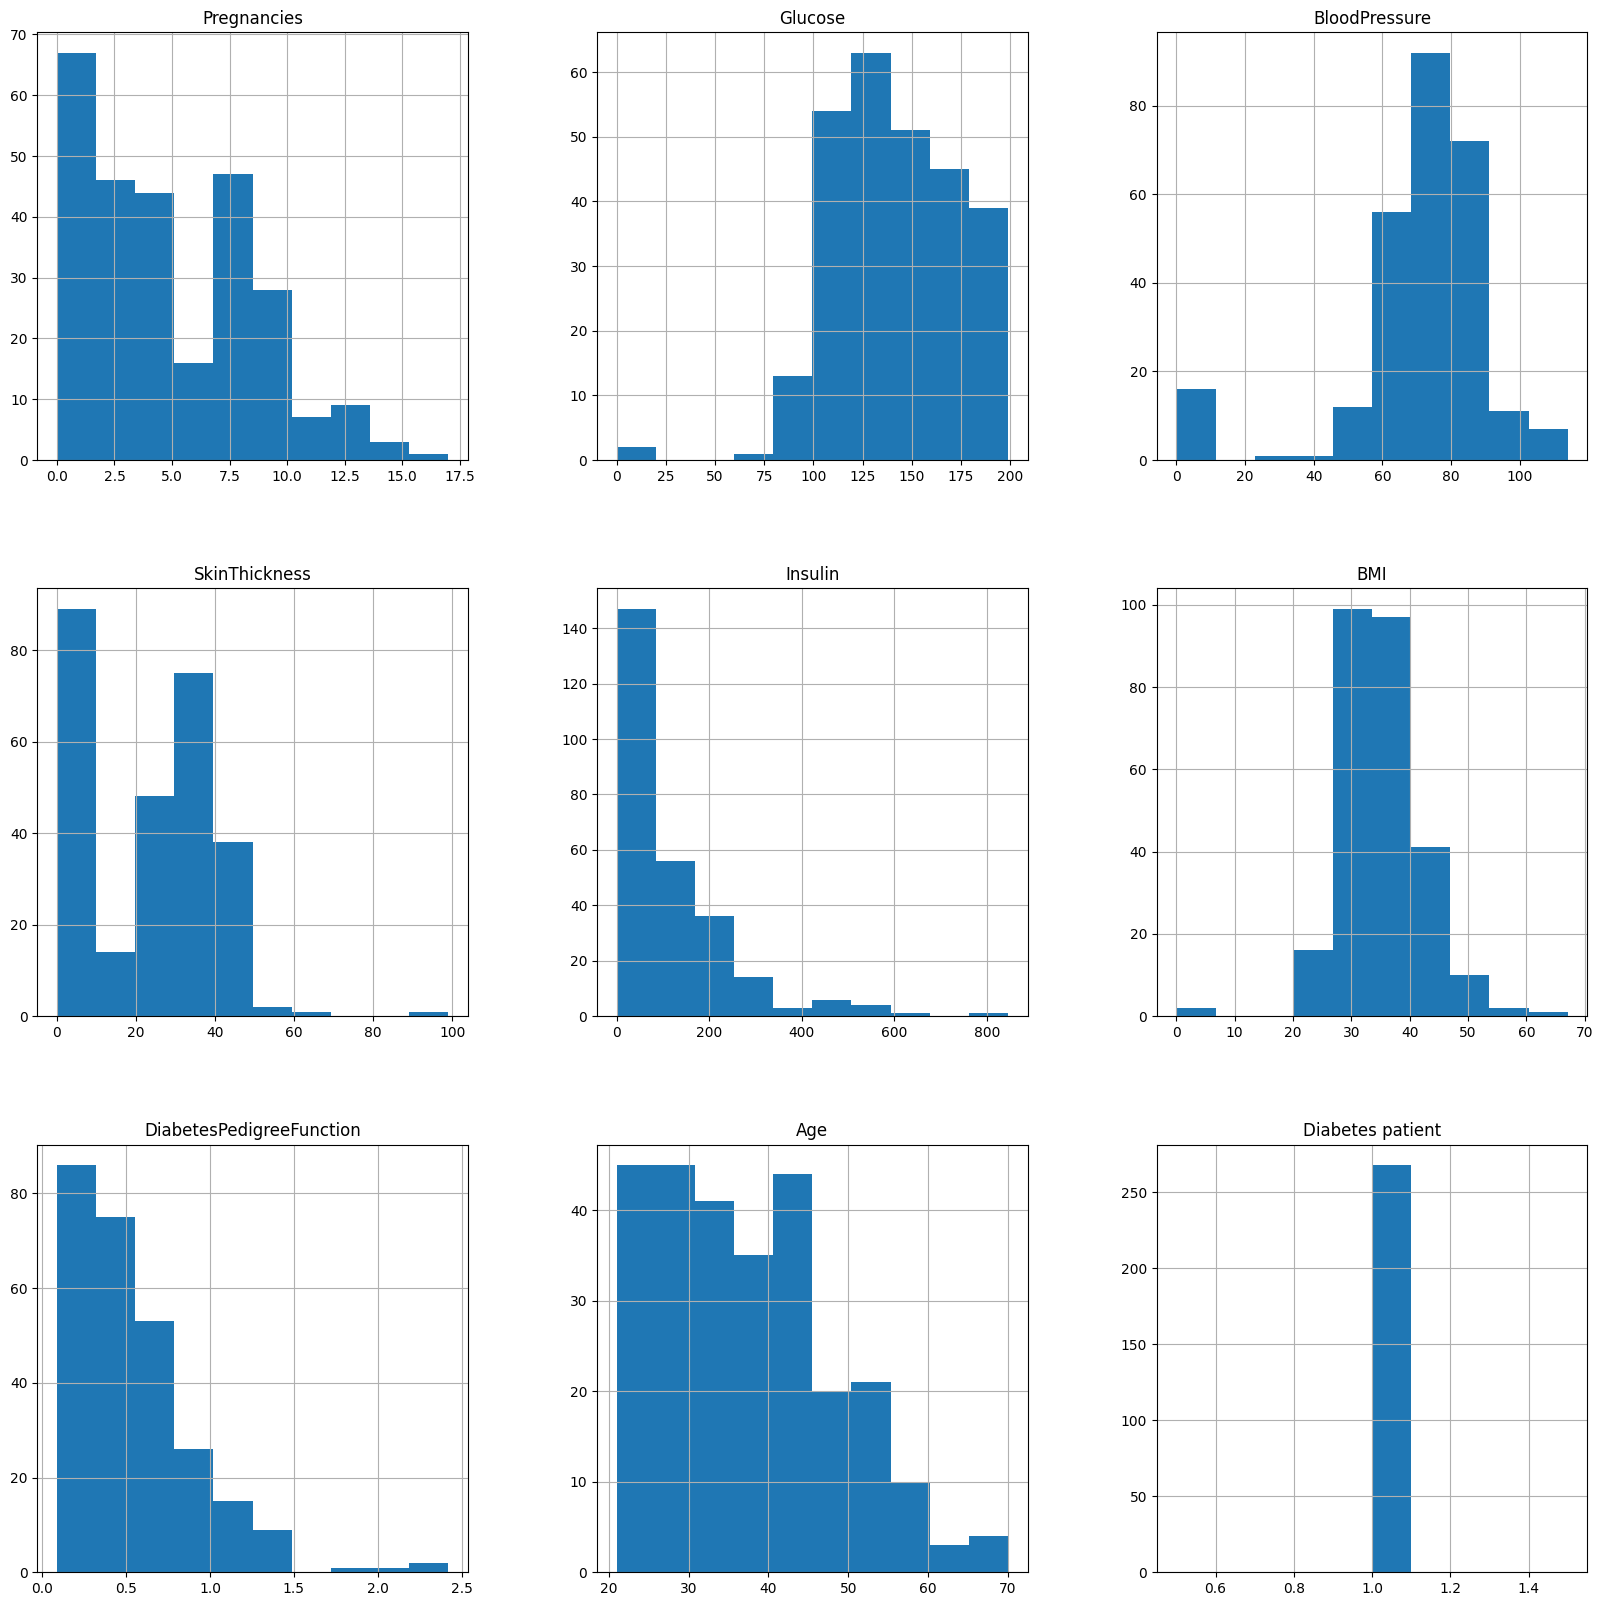

In [16]:
import matplotlib.pyplot as plt
p=diabetes_dataset[diabetes_dataset['Outcome']==1].hist(figsize=(20,20))
plt.title('Diabetes patient')

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [19]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [23]:
classifier=svm.SVC(kernel='linear')

In [25]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [26]:
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [27]:
print('Accuracy score of the training data: ',training_data_accuracy)

Accuracy score of the training data:  0.7833876221498371


In [28]:
input_data=(5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=classifier.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[1]
The person is diabetic


In [29]:
import pickle

In [39]:
filename=r'C:\Users\Pranitha\OneDrive\Desktop\diabetes_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [40]:
loaded_model = pickle.load(open(r'C:\Users\Pranitha\OneDrive\Desktop\diabetes_model.sav', 'rb'))

In [41]:
input_data=(5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[1]
The person is diabetic


In [43]:
for column in x.columns:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


# Parkisons  

In [45]:
parkinsons_data=pd.read_csv(r'C:\Users\Pranitha\OneDrive\Desktop\parkinsons.csv')

In [46]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [47]:
parkinsons_data.shape

(195, 24)

In [49]:
x=parkinsons_data.drop(columns=['name','status'],axis=1)
y=parkinsons_data['status']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [51]:
model=svm.SVC(kernel='linear')

In [52]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [53]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print('Accuracy score of the training data: ',training_data_accuracy)

Accuracy score of the training data:  0.8653846153846154


In [54]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print('Accuracy score of the test data: ',test_data_accuracy)

Accuracy score of the test data:  0.8461538461538461


In [62]:
input_data=(197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.00339,26.77500,0.42)
input_data_as_numpy_array=np.asarray(input_data)
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data_reshaped)
prediction = model.predict(input_data_scaled)
print(prediction)
if (prediction[0]==0):
    print("The person is doesnot have parkinsons Disease")
else:
    print("The person has Parkinsons")

ValueError: X has 16 features, but SVC is expecting 22 features as input.

In [63]:
import pickle
filename='parkinsons_model.sav'
pickle.dump(model,open(filename,'wb'))
loaded_model=pickle.load(open('parkinsons_model.sav','rb'))
for column in x.columns:
    print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
